In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
import pylab
from IPython.display import display, HTML

#functions
def vel_simples(r,R0,cte):
    return np.sqrt(cte * R0**2 * (1-R0/r*np.arctan(r/R0)) )
def vel_NFW(r,R0,cte):
    return  np.sqrt(cte * R0**3/r * ( np.log(1+r/R0) - r/(R0+r) ) )
def chi_squared_test(obs,expt,error):
    return np.sum((obs-expt)**2/(error**2))

In [2]:
def fit(folder_name):
    
    #lendo arquivo
    df = pd.read_csv('/home/victor/Desktop/Code/IC/data/'+folder_name+'_with_errors.csv',sep = ',')
    df = df.drop(df.columns[[0]],axis=1)

    results = [[],[]]
    
    #chute inicial
    g = [1,5000]

    #simple model
    try:
        popt_simples,pcov = curve_fit(vel_simples,df['rad'],df['vel'],g,sigma=df['vel_error'],absolute_sigma=True)
        yfit_simples = vel_simples(df['rad'],*popt_simples) #parameter fit
        chi_test_simples = chi_squared_test(df['vel'],[vel_simples(r,*popt_simples) for r in df['rad']],df['vel_error'])
    except:
        popt_simples = [None,None]
        yfit_simples = [None]*len(df['rad'])
        chi_test_simples = None


    #NFW model
    try:
        popt_NFW,pcov = curve_fit(vel_NFW,df['rad'],df['vel'],g,sigma=df['vel_error'],absolute_sigma=True)
        yfit_NFW = vel_NFW(df['rad'],*popt_NFW) #parameter fit
        chi_test_NFW = chi_squared_test(df['vel'],[vel_NFW(r,*popt_NFW) for r in df['rad']],df['vel_error'])
    except:
        popt_NFW = [None,None]
        yfit_NFW = [None]*len(df['rad'])
        chi_test_NFW = None
        


    #plot
    plt.figure(figsize=(16,9))
    plt.title(folder_name.upper(),fontsize=40)

    plt.xlabel("Raio (kpc)",fontsize=30)
    plt.ylabel("Velocidade (km s⁻¹)",fontsize=30)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    #chi = mpatches.Patch(color='red',label='chi_test: '+str(chi_test_simples))
    #R0 = mpatches.Patch(color='green',label='R0: '+str(popt[0]))
    #cte = mpatches.Patch(color='green',label='cte: '+str(popt[1]))
    #plt.legend(handles=[chi,R0,cte],fontsize='xx-large',loc='upper left')

    plt.errorbar(df['rad'],df['vel'],yerr=df['vel_error'],fmt='o',color='black')
    plt.plot(df['rad'],yfit_simples,label="eq. (4)",color='orange')
    plt.plot(df['rad'],yfit_NFW,label="NFW",color='blue')
    plt.legend(fontsize='xx-large',loc='lower right') #loc='lower right' para NGC2903 e NGC6503
    plt.show()

    return [ [chi_test_simples,*popt_simples] , [chi_test_NFW,*popt_NFW] ]

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


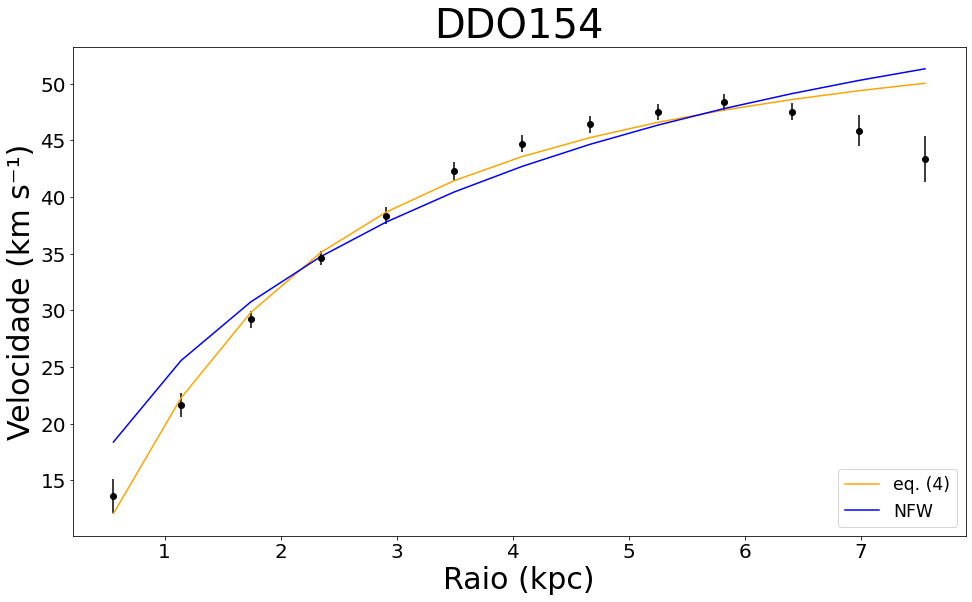

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


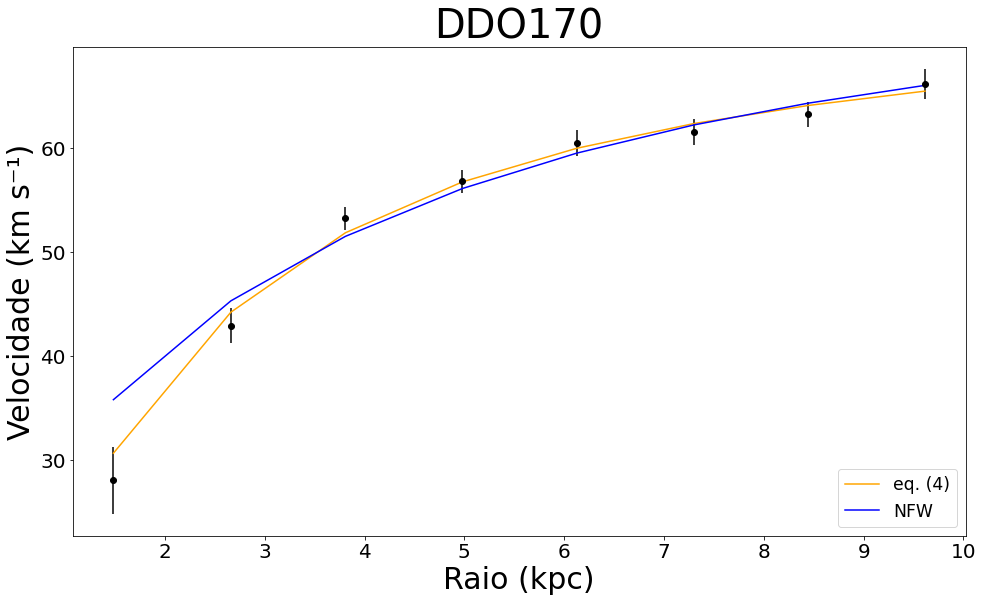

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


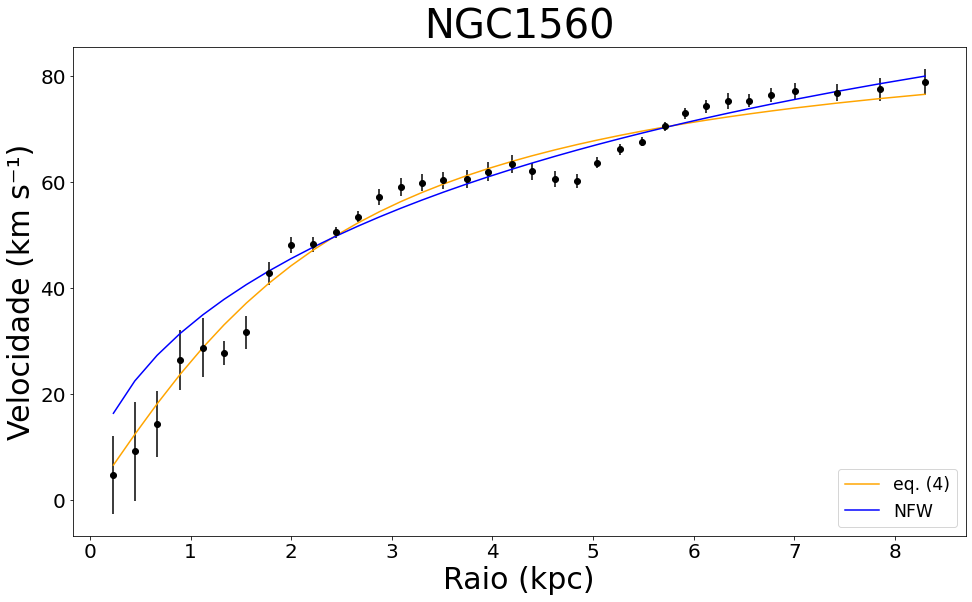

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


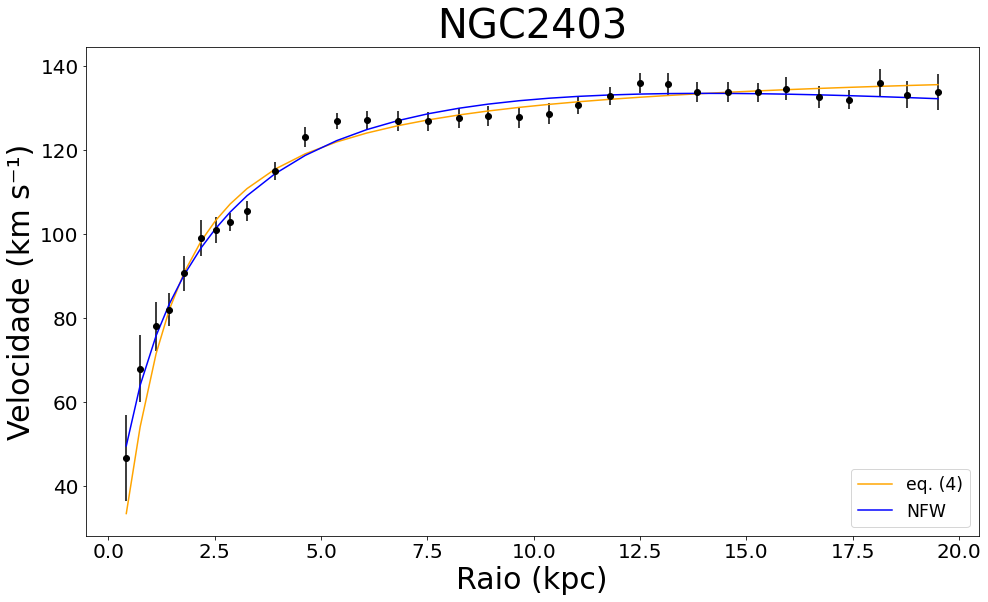

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


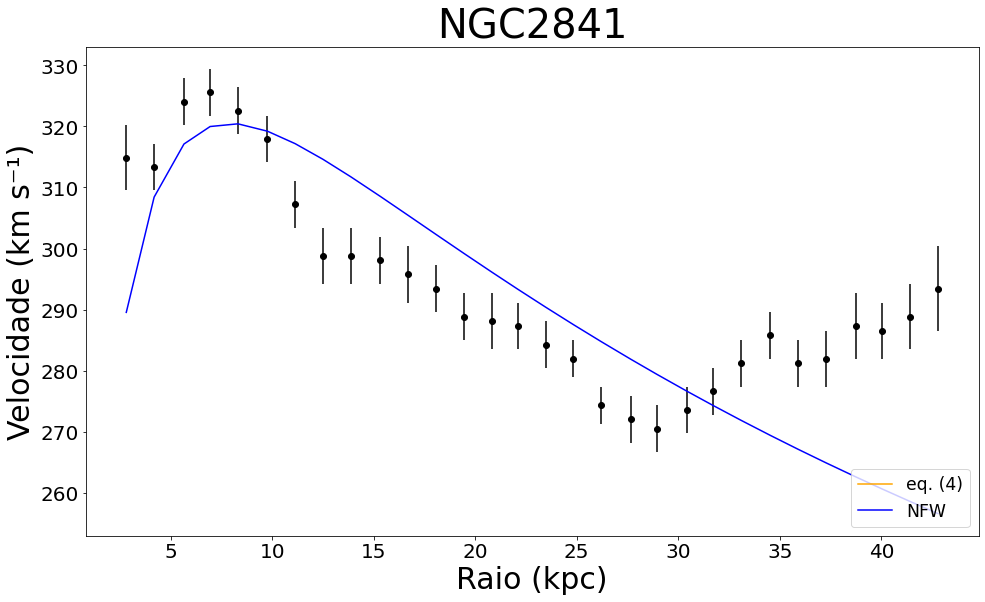

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


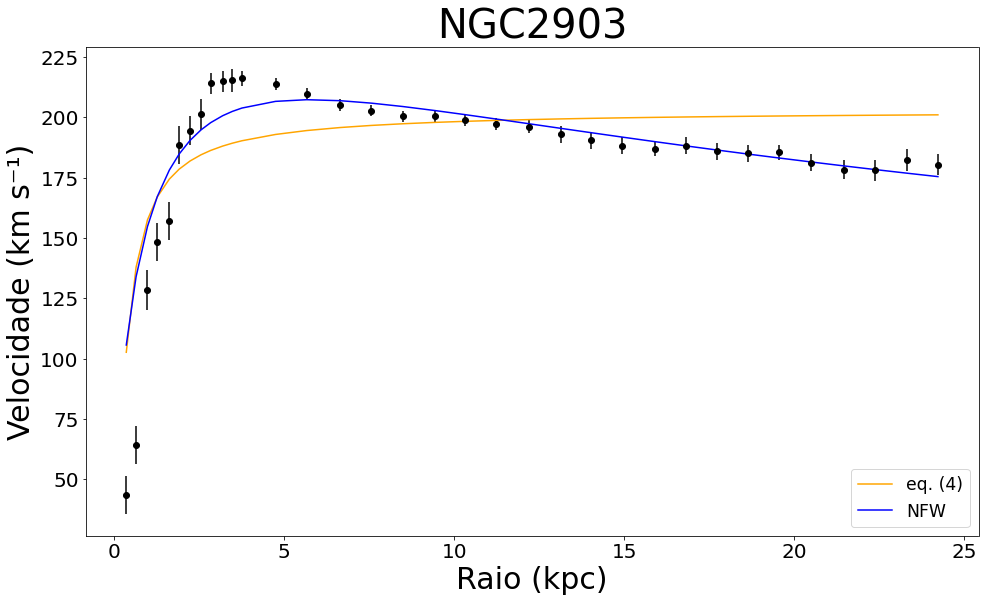

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


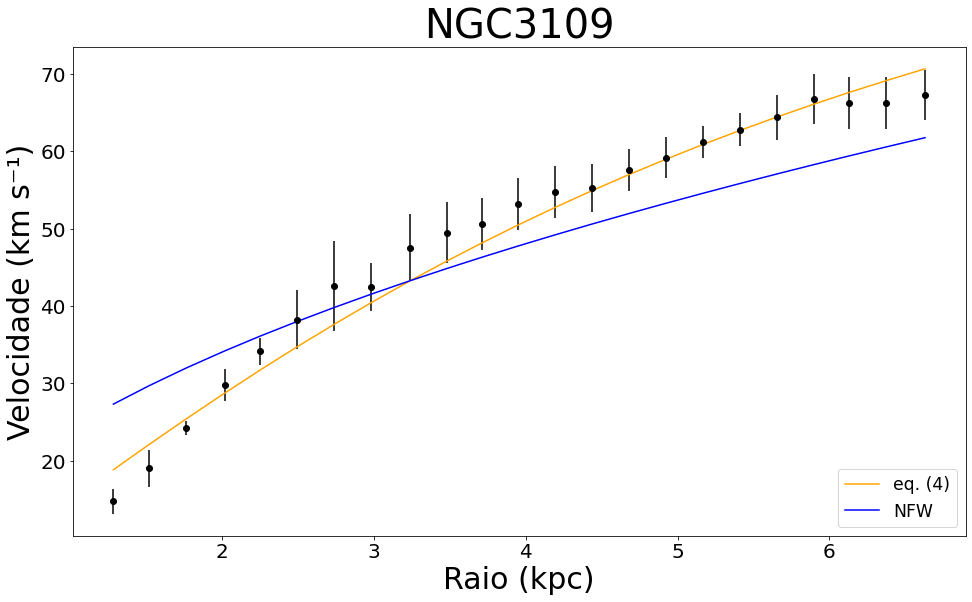

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


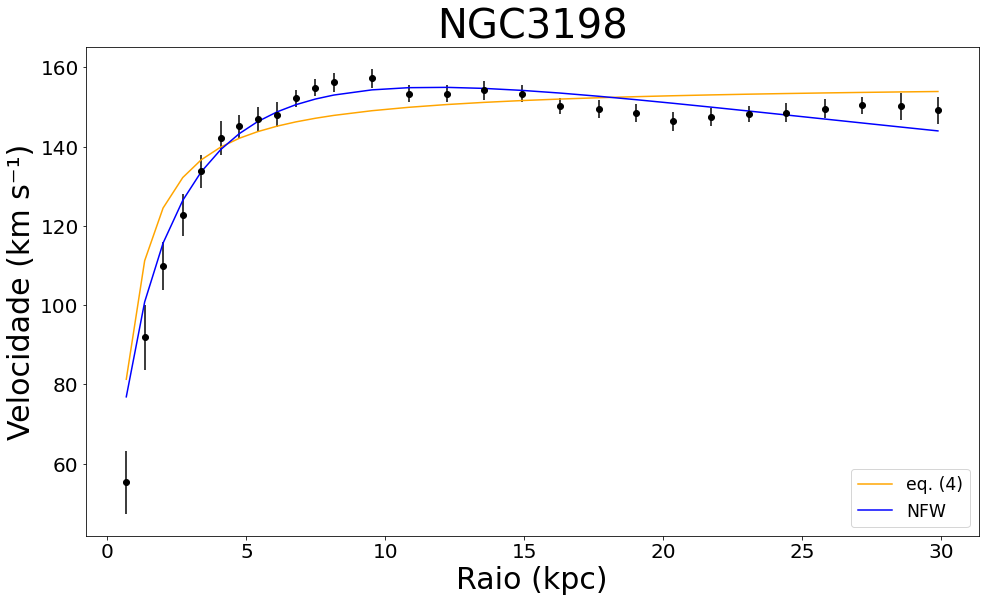

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


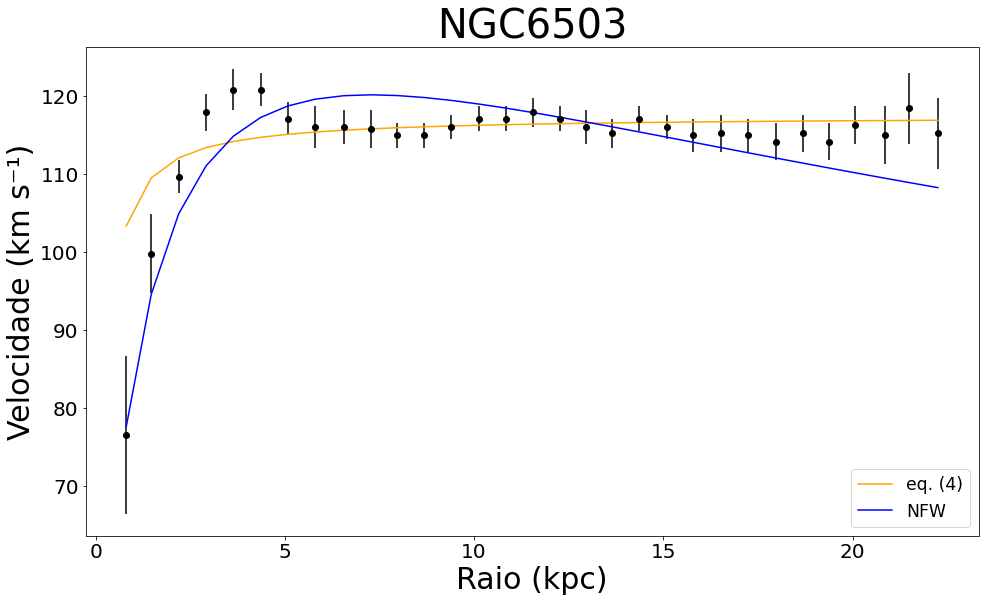

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


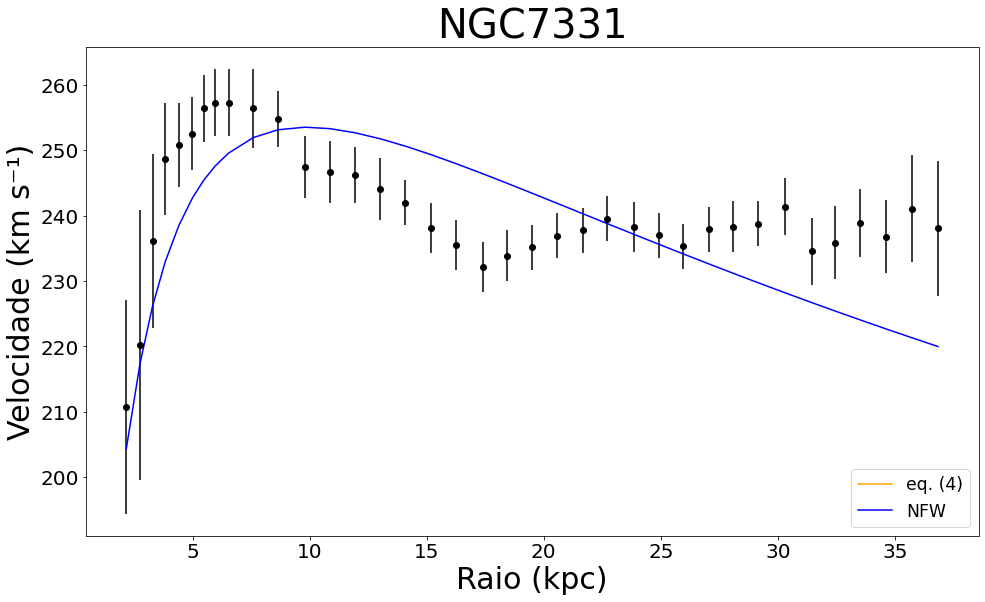

/home/victor/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


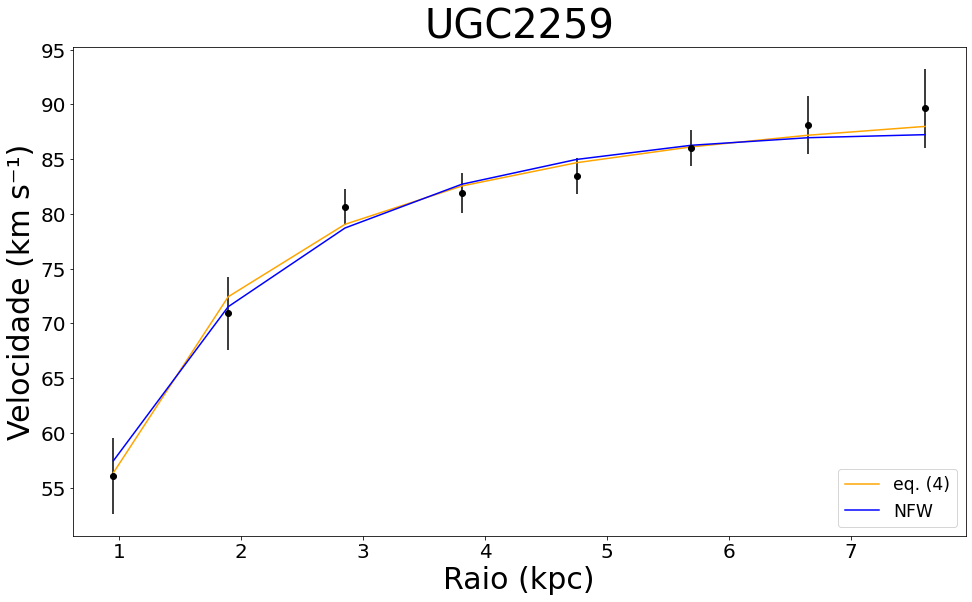

In [3]:
galaxies = ['ddo154','ddo170','ngc1560','ngc2403','ngc2841','ngc2903','ngc3109','ngc3198','ngc6503','ngc7331','ugc2259']
values_simples = []
values_NFW = []

for galaxy in galaxies:
    results = fit(galaxy)
    values_simples.append(results[0])
    values_NFW.append(results[1])

In [4]:
galaxies = [galaxy.upper() for galaxy in galaxies]
data_simples = pd.DataFrame(np.column_stack((galaxies,values_simples)),columns=['galaxy','chi_eq.(4)','R0_eq.(4)','P0_eq.(4)'])
data_NFW = pd.DataFrame(np.column_stack((galaxies,values_NFW)),columns=['galaxy','chi_NFW','R0_NFW','P0_NFW'])

data = data_simples
data['chi_NFW'] = data_NFW['chi_NFW']
data['R0_NFW'] = data_NFW['R0_NFW']
data['P0_NFW'] = data_NFW['P0_NFW']
data = data.reindex(['galaxy','chi_eq.(4)','chi_NFW','R0_eq.(4)','R0_NFW','P0_eq.(4)','P0_NFW'],axis=1)
data = data.set_index('galaxy')
data

,chi_eq.(4),chi_NFW,R0_eq.(4),R0_NFW,P0_eq.(4),P0_NFW
galaxy,,,,,,
DDO154,30.9854,80.35362156763811,1.50962,13.442117364209812,1514.18,95.02161635067792
DDO170,4.00673,12.141398793693714,1.81859,12.156378724276811,1757.41,165.52884050015655
NGC1560,129.211,125.00295658100758,1.89098,23.811866913015944,2360.47,96.81065789894014
NGC2403,36.8847,27.995544385843097,0.97382,6.502499206368577,20995.1,1951.4298094548653
NGC2841,None,282.45986080790306,None,3.661257620347877,None,35440.98783015776
NGC2903,741.397,238.1452069630926,0.306838,2.6512734979357377,437917,28278.35551687797
NGC3109,19.5353,230.3192158370669,4.94796,1163.810919595102,666.507,0.9965493712524445
NGC3198,118.04,39.86773248844122,0.562945,5.4425649999218715,76973.9,3748.620358531364
NGC6503,38.9781,82.12501646159836,-0.12938,3.357765437592048,823325,5919.899252312824


In [5]:
galaxies = [galaxy.upper() for galaxy in galaxies]
data_simples = pd.DataFrame(np.column_stack((galaxies,values_simples)),columns=['galaxy','chi_eq.(4)','R0_eq.(4) [kpc]','P0_eq.(4) [km.s⁻¹.kpc⁻¹]'])
data_NFW = pd.DataFrame(np.column_stack((galaxies,values_NFW)),columns=['galaxy','chi_NFW','R0_NFW [kpc]','P0_NFW [km.s⁻¹.kpc⁻¹]'])

data = data_simples
data['chi_NFW'] = data_NFW['chi_NFW']
data['R0_NFW [kpc]'] = data_NFW['R0_NFW [kpc]']
data['P0_NFW [km.s⁻¹.kpc⁻¹]'] = data_NFW['P0_NFW [km.s⁻¹.kpc⁻¹]']
data = data.reindex(['galaxy','chi_eq.(4)','chi_NFW','R0_eq.(4) [kpc]','R0_NFW [kpc]','P0_eq.(4) [km.s⁻¹.kpc⁻¹]','P0_NFW [km.s⁻¹.kpc⁻¹]'],axis=1)
data = data.set_index('galaxy')
data = data.astype(float)
pd.set_option('display.float_format', '{:.4g}'.format)
data

,chi_eq.(4),chi_NFW,R0_eq.(4) [kpc],R0_NFW [kpc],P0_eq.(4) [km.s⁻¹.kpc⁻¹],P0_NFW [km.s⁻¹.kpc⁻¹]
galaxy,,,,,,
DDO154,30.99,80.35,1.51,13.44,1514,95.02
DDO170,4.007,12.14,1.819,12.16,1757,165.5
NGC1560,129.2,125,1.891,23.81,2360,96.81
NGC2403,36.88,28,0.9738,6.502,2.1e+04,1951
NGC2841,nan,282.5,nan,3.661,nan,3.544e+04
NGC2903,741.4,238.1,0.3068,2.651,4.379e+05,2.828e+04
NGC3109,19.54,230.3,4.948,1164,666.5,0.9965
NGC3198,118,39.87,0.5629,5.443,7.697e+04,3749
NGC6503,38.98,82.13,-0.1294,3.358,8.233e+05,5920


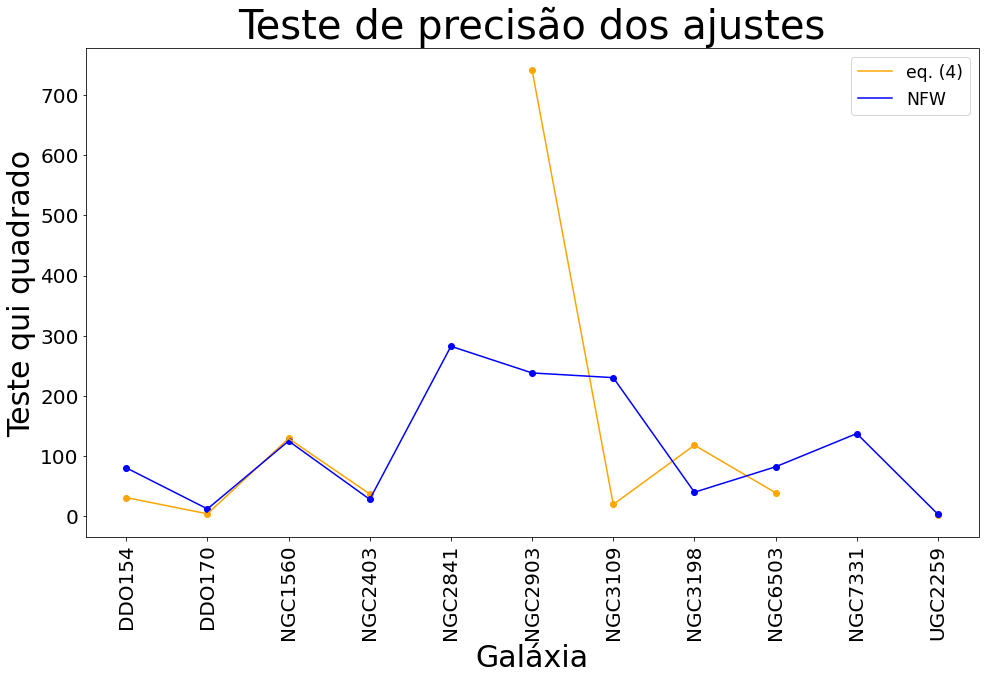

In [6]:
plt.figure(figsize=(16,9))
plt.plot(np.arange(11),[float(x) if x else None for x in data_simples["chi_eq.(4)"]],label="eq. (4)",color='orange')
plt.scatter(np.arange(11),[float(x) if x else None for x in data_simples["chi_eq.(4)"]],color='orange')
plt.plot(np.arange(11),[float(x) if x else None for x in data_NFW["chi_NFW"]],label="NFW",color='blue')
plt.scatter(np.arange(11),[float(x) if x else None for x in data_NFW["chi_NFW"]],color='blue')
plt.legend(fontsize='xx-large')
plt.title("Teste de precisão dos ajustes",fontsize=40)
plt.xlabel("Galáxia",fontsize=30)
plt.ylabel("Teste qui quadrado",fontsize=30)
plt.xticks(range(len(galaxies)),galaxies,rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.show()